# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

weather_response = requests.get(query_url)
weather_json = weather_response.json()

weather_json


{'coord': {'lon': 37.6156, 'lat': 55.7522},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 40.03,
  'feels_like': 35.83,
  'temp_min': 37.15,
  'temp_max': 44.38,
  'pressure': 1025,
  'humidity': 75,
  'sea_level': 1025,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 5.93, 'deg': 24, 'gust': 14.07},
 'clouds': {'all': 12},
 'dt': 1665434664,
 'sys': {'type': 2,
  'id': 2000314,
  'country': 'RU',
  'sunrise': 1665373767,
  'sunset': 1665413007},
 'timezone': 10800,
 'id': 524901,
 'name': 'Moscow',
 'cod': 200}

In [9]:
temperature = []
humidity = []
cloudiness = []
windspeed = []
lat = []
lng = []
date = []
countries = []
City=[]

count = 0
set= 1

for index, city in enumerate(cities):
    count = count + 1
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        humidity.append(response["main"]["humidity"])
        temperature.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        countries.append(response["sys"]["country"])
        City.append(city)
    except:
        print(f"City not processed {city}")
        
        pass

Processing Record 1 of Set 1 | beloha
Processing Record 2 of Set 1 | sarangani
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | arman
Processing Record 5 of Set 1 | biankouma
Processing Record 6 of Set 1 | smithers
Processing Record 7 of Set 1 | viligili
City not processed viligili
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | port macquarie
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | alotau
City not processed alotau
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | salta
Processing Record 21 of Set 1 | karauzyak
City not processed karauzyak
Processing Record 22 of Set 1 | nadym
Processing Record 23 of Set 1 | port al

City not processed umzimvubu
Processing Record 38 of Set 4 | srednekolymsk
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | amapa
Processing Record 44 of Set 4 | saint-joseph
Processing Record 45 of Set 4 | richha
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | raudeberg
Processing Record 49 of Set 4 | kawalu
Processing Record 50 of Set 4 | hurghada
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | galle
Processing Record 3 of Set 5 | bambanglipuro
Processing Record 4 of Set 5 | atikokan
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | faya
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | whitehorse
Processing Record 9 of Set 5 | halalo
City not processed halalo
Processing Record 10 of Set 5 | melfi

City not processed saleaula
Processing Record 27 of Set 8 | nemuro
Processing Record 28 of Set 8 | hvolsvollur
Processing Record 29 of Set 8 | kumluca
Processing Record 30 of Set 8 | champerico
Processing Record 31 of Set 8 | mpanda
Processing Record 32 of Set 8 | callaway
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | kokopo
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | bilma
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | ponta do sol
Processing Record 39 of Set 8 | omsukchan
Processing Record 40 of Set 8 | manzhouli
Processing Record 41 of Set 8 | egvekinot
Processing Record 42 of Set 8 | cacu
Processing Record 43 of Set 8 | maputo
Processing Record 44 of Set 8 | chake chake
Processing Record 45 of Set 8 | hamilton
Processing Record 46 of Set 8 | flin flon
Processing Record 47 of Set 8 | feijo
Processing Record 48 of Set 8 | balikpapan
Processing Record 49 of Set 8 | hirara
Processing Record 50 of Set 8 | norman w

Processing Record 13 of Set 12 | kaura namoda
Processing Record 14 of Set 12 | maralal
Processing Record 15 of Set 12 | mecca
Processing Record 16 of Set 12 | moerai
Processing Record 17 of Set 12 | sfantu gheorghe
Processing Record 18 of Set 12 | whyalla
Processing Record 19 of Set 12 | rovinari
Processing Record 20 of Set 12 | lanivtsi
Processing Record 21 of Set 12 | komsomolskiy
Processing Record 22 of Set 12 | abha
Processing Record 23 of Set 12 | catuday
Processing Record 24 of Set 12 | luan
Processing Record 25 of Set 12 | caravelas
Processing Record 26 of Set 12 | laizhou
Processing Record 27 of Set 12 | harper
Processing Record 28 of Set 12 | sangar
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | vikhorevka


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
a = {"City": City,"Lat": lat,"Lng": lng,"Max_Temp": temperature,"Humidity": humidity,"Cloudiness": cloudiness,"Wind Speed": windspeed,"Country": countries,"Date": date}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()
df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beloha,-25.1667,45.05,66.02,98,18,4.16,MG,1665435071
1,sarangani,5.4033,125.4636,83.44,77,75,13.53,PH,1665435072
2,tuktoyaktuk,69.4541,-133.0374,30.2,86,100,20.71,CA,1665434770
3,arman,59.7,150.1667,24.17,82,45,5.84,RU,1665435074
4,biankouma,7.7391,-7.6138,70.34,91,13,1.79,CI,1665435074
...,...,...,...,...,...,...,...,...,...
525,laizhou,37.1717,119.9214,49.21,54,0,6.87,CN,1665436272
526,harper,4.375,-7.7169,76.77,89,83,5.39,LR,1665436272
527,sangar,63.9242,127.4739,16.16,93,46,1.95,RU,1665436272
528,mareeba,-17,145.4333,72.32,92,11,2.51,AU,1665436272


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity100 = df[(df["Humidity"] > 100)].index
humidity100


Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = df.drop(humidity100, inplace=False)
clean_city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beloha,-25.1667,45.05,66.02,98,18,4.16,MG,1665435071
1,sarangani,5.4033,125.4636,83.44,77,75,13.53,PH,1665435072
2,tuktoyaktuk,69.4541,-133.0374,30.2,86,100,20.71,CA,1665434770
3,arman,59.7,150.1667,24.17,82,45,5.84,RU,1665435074
4,biankouma,7.7391,-7.6138,70.34,91,13,1.79,CI,1665435074
...,...,...,...,...,...,...,...,...,...
525,laizhou,37.1717,119.9214,49.21,54,0,6.87,CN,1665436272
526,harper,4.375,-7.7169,76.77,89,83,5.39,LR,1665436272
527,sangar,63.9242,127.4739,16.16,93,46,1.95,RU,1665436272
528,mareeba,-17,145.4333,72.32,92,11,2.51,AU,1665436272


In [14]:
#export into csv
clean_city_data.to_csv("./output_data/clean_city_data.csv", index=False)

clean_city_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beloha,-25.1667,45.05,66.02,98,18,4.16,MG,1665435071
1,sarangani,5.4033,125.4636,83.44,77,75,13.53,PH,1665435072
2,tuktoyaktuk,69.4541,-133.0374,30.2,86,100,20.71,CA,1665434770
3,arman,59.7,150.1667,24.17,82,45,5.84,RU,1665435074
4,biankouma,7.7391,-7.6138,70.34,91,13,1.79,CI,1665435074
...,...,...,...,...,...,...,...,...,...
525,laizhou,37.1717,119.9214,49.21,54,0,6.87,CN,1665436272
526,harper,4.375,-7.7169,76.77,89,83,5.39,LR,1665436272
527,sangar,63.9242,127.4739,16.16,93,46,1.95,RU,1665436272
528,mareeba,-17,145.4333,72.32,92,11,2.51,AU,1665436272


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

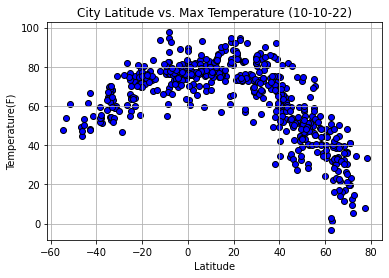

In [16]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max_Temp"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Max_Temp"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Max Temperature ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("output_data/fig1.png")
plt.show()



## Latitude vs. Humidity Plot

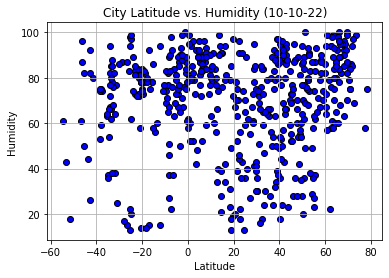

In [17]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Humidity ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

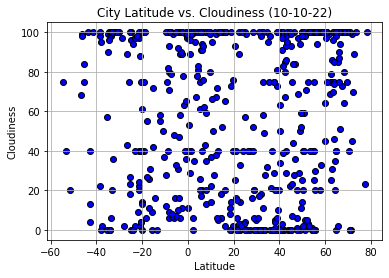

In [18]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Cloudiness ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

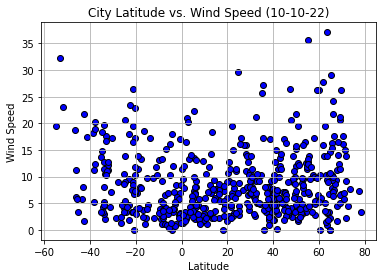

In [19]:
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")

x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]

plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolors="black", facecolors="blue")
plt.title(f"City Latitude vs. Wind Speed ({datestr})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [20]:
#Creating data frames for Northern and Southern Hemispheres


northern_hem = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) >= 0, :]
southern_hem = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) < 0, :]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8099949920249156
y = -0.81x + 90.59


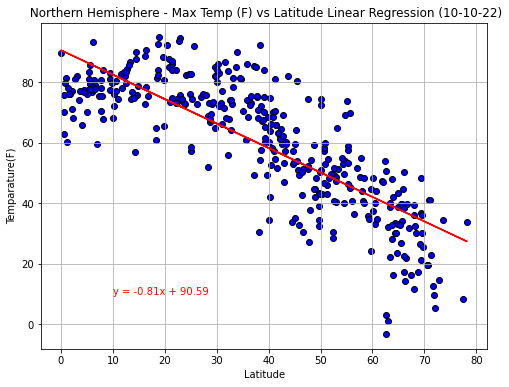

In [21]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Max_Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(10,10),color="red")
plt.xlabel("Latitude")
plt.ylabel("Temparature(F)")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Max Temp (F) vs Latitude Linear Regression ({datestr})")
plt.grid()
plt.savefig("output_data/fig5.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.731261112552111
y = 0.56x + 81.16


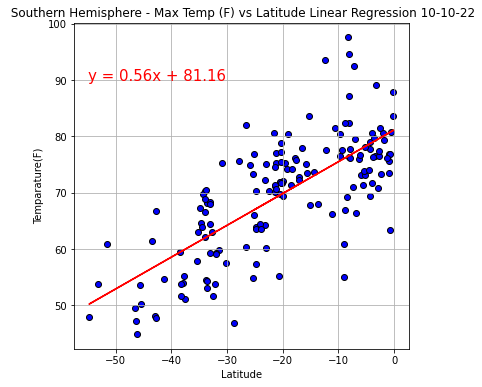

In [22]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Max_Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
fig1, ax1 = plt.subplots(figsize=(6,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temparature(F)")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Max Temp (F) vs Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig6.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.098525992406918
y = 0.1x + 66.03


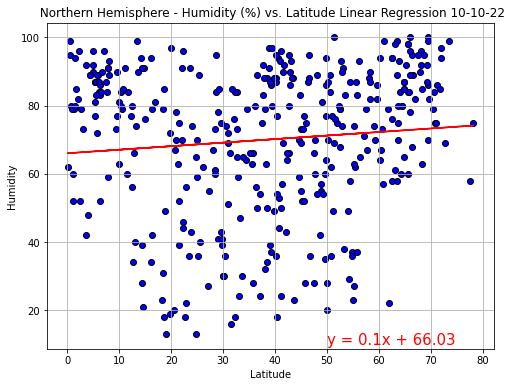

In [23]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig7.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.17720709398127524
y = 0.27x + 75.53


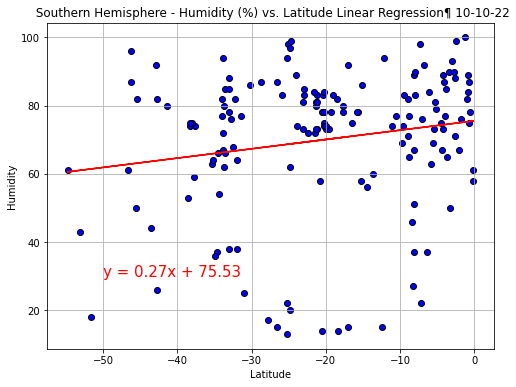

In [24]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶ {datestr}")
plt.grid()
plt.savefig("output_data/fig8.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.1117475608962149
y = 0.21x + 45.11


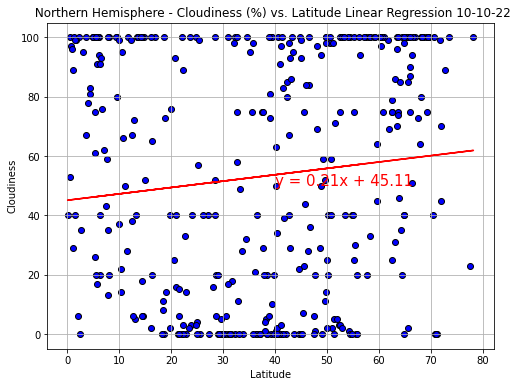

In [25]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig9.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.06870558416516488
y = -0.19x + 54.63


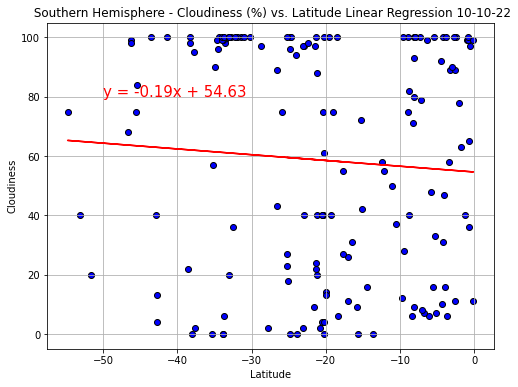

In [26]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig9.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.21083992340791521
y = 0.06x + 6.01


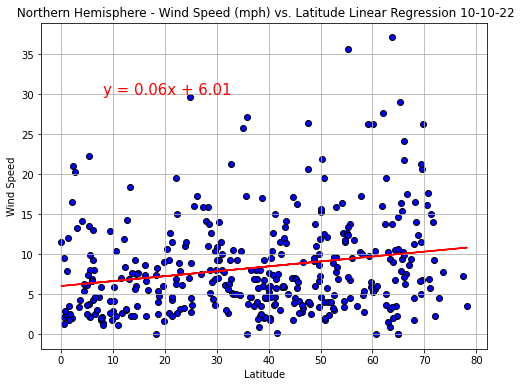

In [27]:
x_values = pd.to_numeric(northern_hem['Lat']).astype(float)
y_values = pd.to_numeric(northern_hem['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(8,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig10.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.4083678633424295
y = -0.19x + 4.62


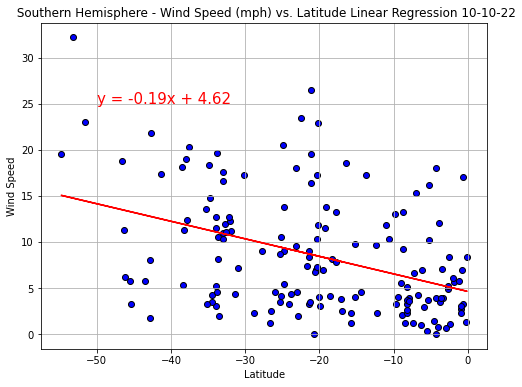

In [28]:
x_values = pd.to_numeric(southern_hem['Lat']).astype(float)
y_values = pd.to_numeric(southern_hem['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values,y_values, edgecolor="black", facecolor="blue")
plt.plot(x_values,regress_values,"r-")
print(f'The r-square is {rvalue}')
print(line_eq)
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
dates = time.gmtime(clean_city_data['Date'][0])
datestr = time.strftime("%d-%m-%y")
plt.title(f" Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {datestr}")
plt.grid()
plt.savefig("output_data/fig11.png")

plt.show()